# ❓ <font color='green'> <u> PROBLEM STATEMENT (CocaCola Prices) </u>

## 🔵 <font color='blue'> Forecast the CocaCola prices dataset. Prepare a document for each model explaining how many dummy variables you have created and RMSE value for each model. Finally which model you will use for Forecasting.

___

## ⚫ <u>Introduction:
+ ###  <font color='candy'><u>WHAT IS FORECAASTING?</u></font> 
    + #### Forecasting is the process of making INFORMED PREDICTIONS based on past and present data as the main input for determining the course of future trends. Forecasting highly depends on the nature of the data, and the process is usually performed on historical data. The more simplified it is, the more accurate the forecasting becomes.

+ ### <font color='candy'><u> FORECASTING METHODS:
    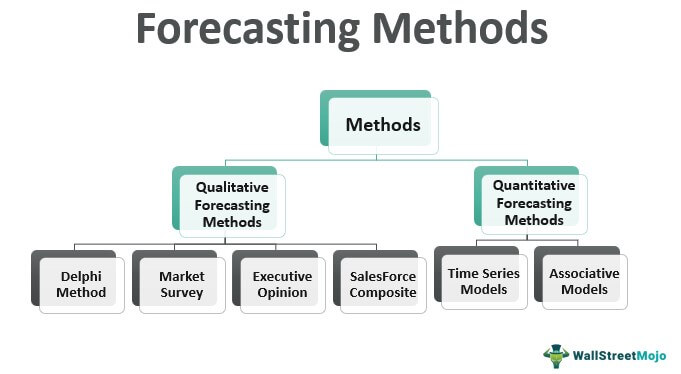
    
+ ### <font color='candy'><u> TIME SERIES FORECASTING:
     + #### Time series forecasting means assessing the time-stamped data using statistical calculations and modeling to make predictions and induce strong strategic decision-making. 
     + #### Since the historical data has a pattern, it becomes evident that the data in the future should also have a pattern, and this method looks at cracking the pattern in the future so that there is very little deviance from the actual calculations and the outcomes in the real world.
    + #### The process is widely adopted in many sectors, for example, sales forecasting and weather forecasting. Examples of time series methods used for forecasting are Autoregression (AR), Moving Average (MA), Autoregressive Moving Average (ARMA), and Autoregressive Integrated Moving Average (ARIMA). 

___

* ### <font color = 'blue'> <u> IMPORT NECESSARY LIBRARIES </u>

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")
sns.set_theme(style= 'darkgrid', palette='viridis')
plt.rcParams['figure.figsize'] = (20,5)
plt.rcParams['figure.dpi'] = 300

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error

___

* ### <font color = 'blue'> <u> READ DATA </u>

In [2]:
df = pd.read_excel('CocaCola_Sales_Rawdata.xlsx')
df

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


___

* ### <font color = 'blue'> <u> PERFORM EDA </u>

* ##### <font color ='green'> <u>Data Summary</u>

In [3]:
df.shape

(42, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


* ##### <font color ='green'> <u>Descriptive statistics</u>

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,42.0,2994.353308,977.930896,1547.818996,2159.714247,2782.376999,3609.25,5253.0


In [6]:
df.isna().sum()

Quarter    0
Sales      0
dtype: int64

In [7]:
df.nunique()

Quarter    42
Sales      42
dtype: int64

> * #### Here we have the sales data of Cocacola from 1986 to 1996 on quarterly basis.
> * #### There are total 42 records. 
> * #### None of them is null.
> * #### Mean sales for this ten years of is period 2994.35

___

* ### <font color = 'blue'> <u> DATA VISUALISATION </u>

* ##### <font color ='green'> <u> TREND
A trend represents a long-term movement or direction in the data over time. It captures the underlying pattern that persists over an extended period.

* ##### <font color ='green'> <u> SEASONALITY    
Seasonality refers to regular and predictable variations in the data that occur at specific intervals. These intervals could be daily, weekly, monthly, or even yearly, depending on the nature of the data.Seasonal patterns often repeat over a fixed period, and they are typically associated with external factors like weather, holidays, or other recurring events.
    
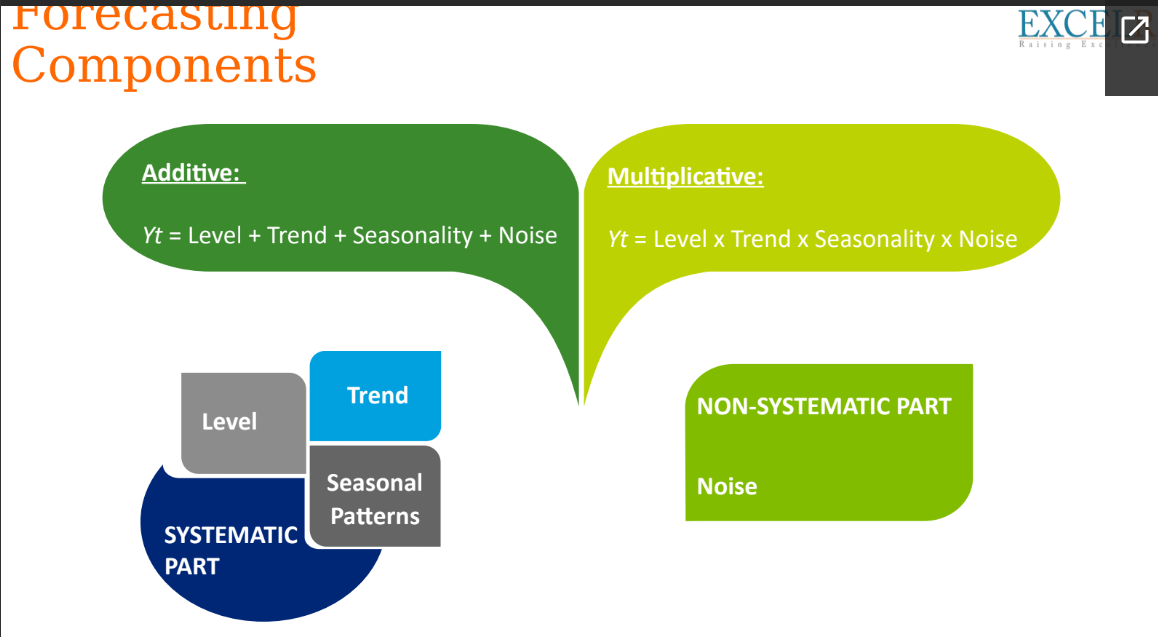

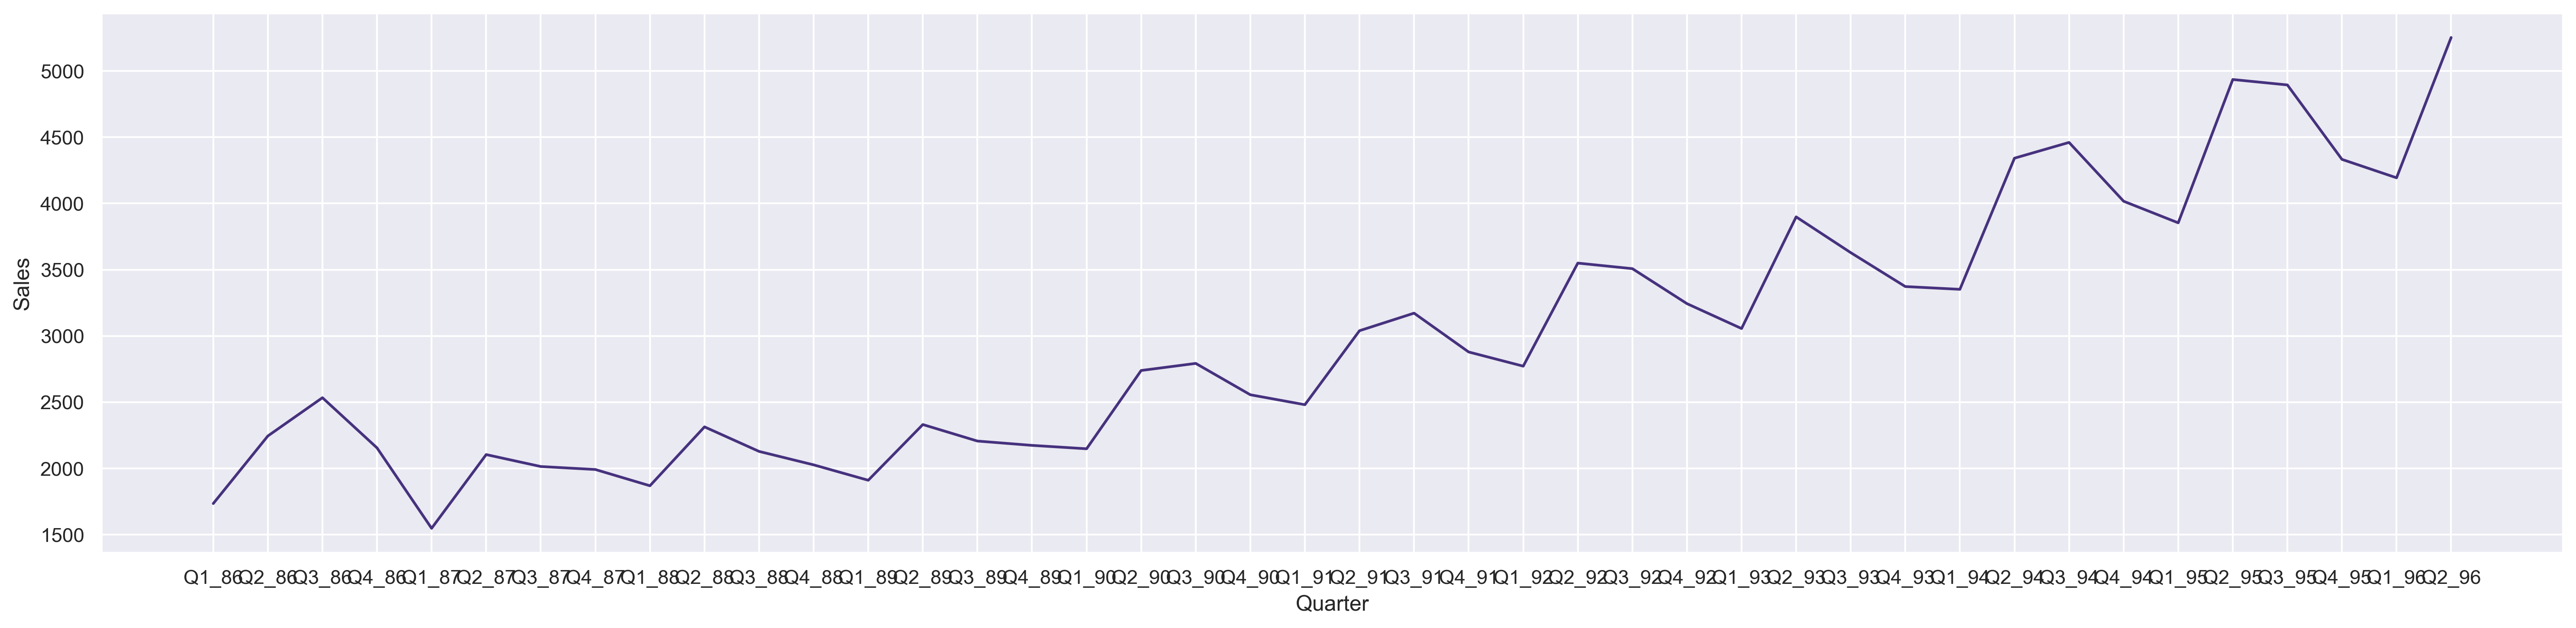

In [8]:
# Line plot to Visualise Trend and Seasonality 
sns.lineplot(x = df['Quarter'], y = df['Sales'])
plt.tight_layout()

> * #### We can see there is Exponential Trend and Additive Seasonality pattern in line plot.

<Axes: xlabel='Sales', ylabel='Density'>

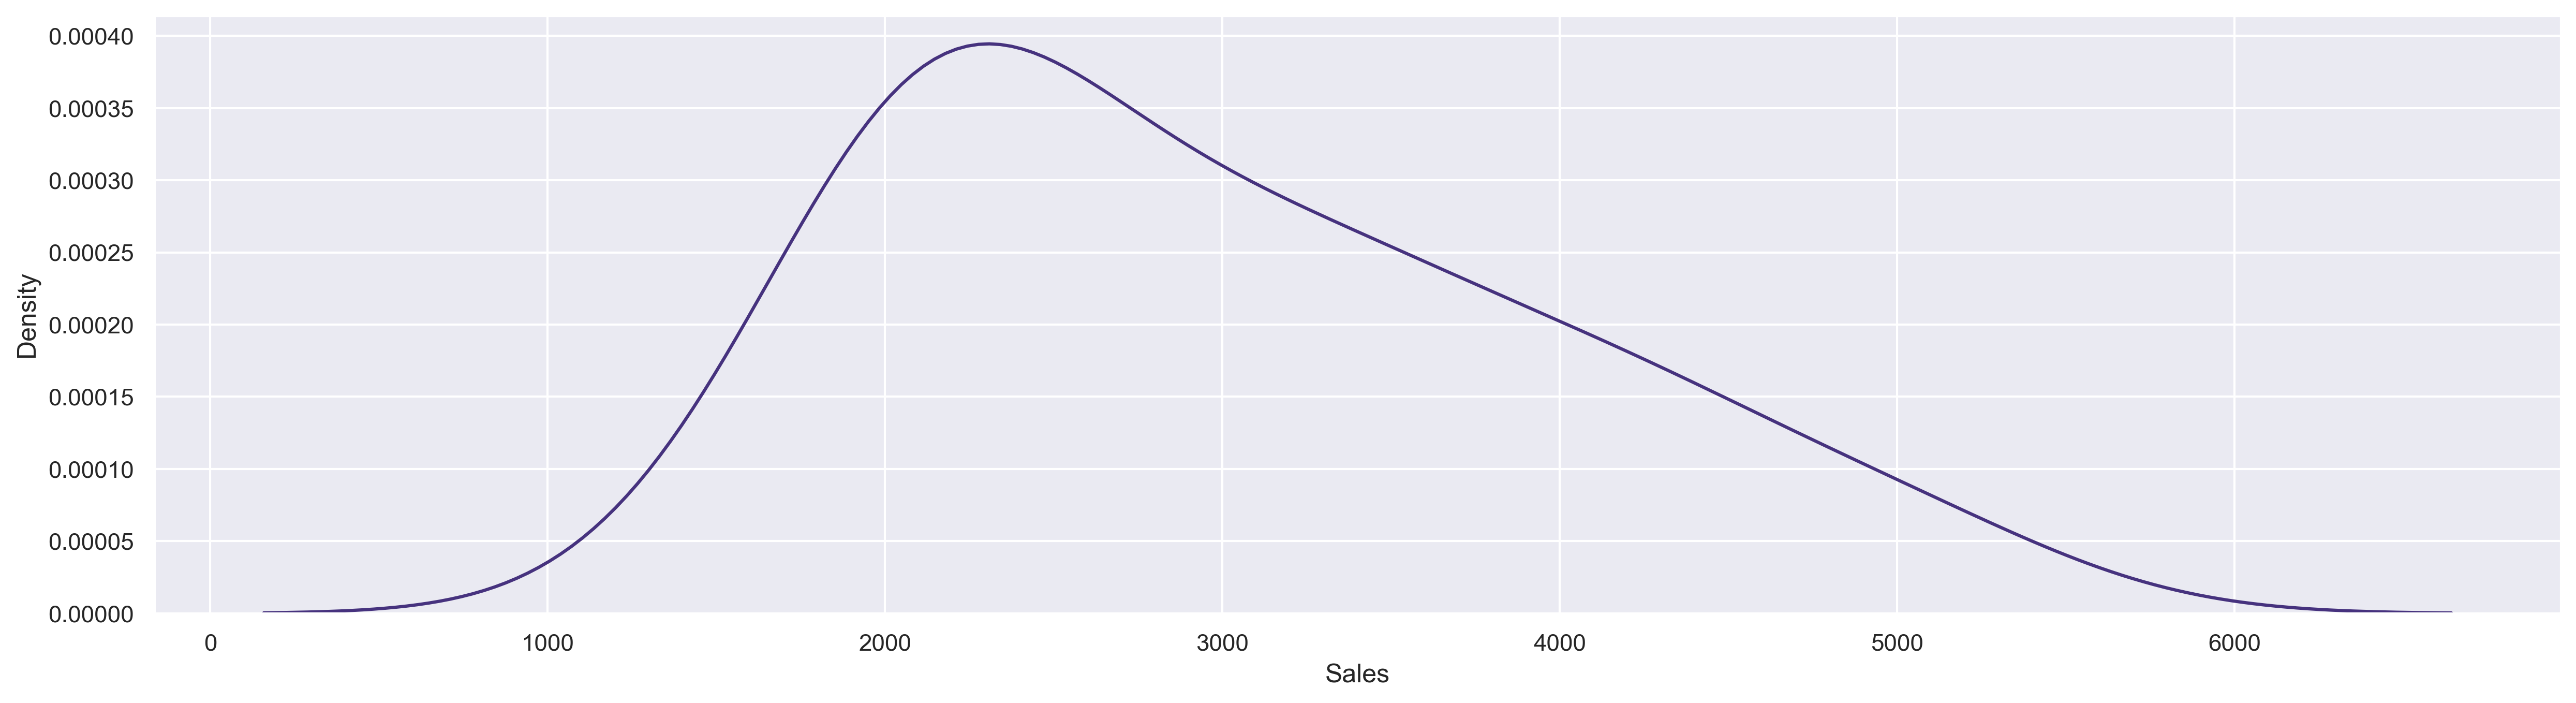

In [9]:
# kde plot for data distribution 
sns.kdeplot(df['Sales'])

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

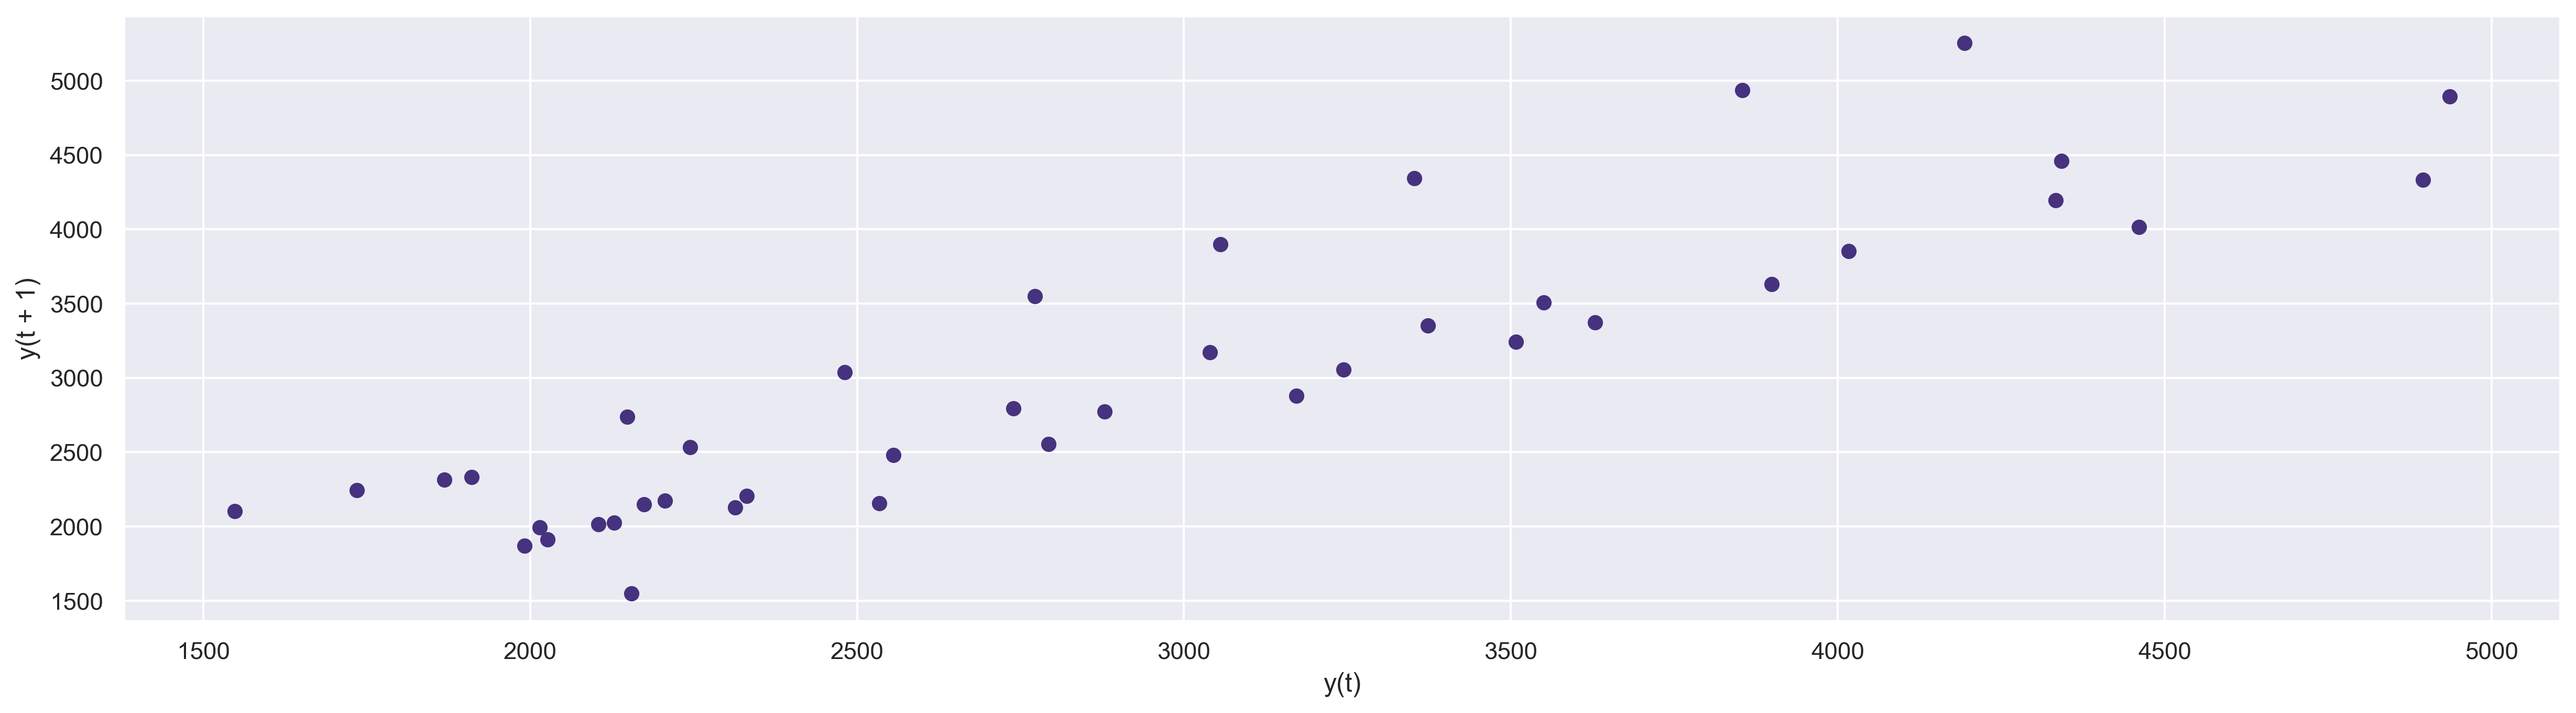

In [10]:
# Lag plot for visualising dependence on previous data
from pandas.plotting import lag_plot
lag_plot(df['Sales'])

> * #### There is positive upward trend in Lag plot indicates that last Quarter's Sales affect the current Quarter's Sales.

* ##### <font color ='green'> <u> Autocorrelation:
   + ##### Autocorrelation shows the correlation of a sequence with itself lagged by some number of time units. 
   + ##### Autocorrelation plot, X-axis shows the lag number, and Y-axis shows the correlation of the sequence with a sequence at that lag. Y-axis ranges from -1 to 1.

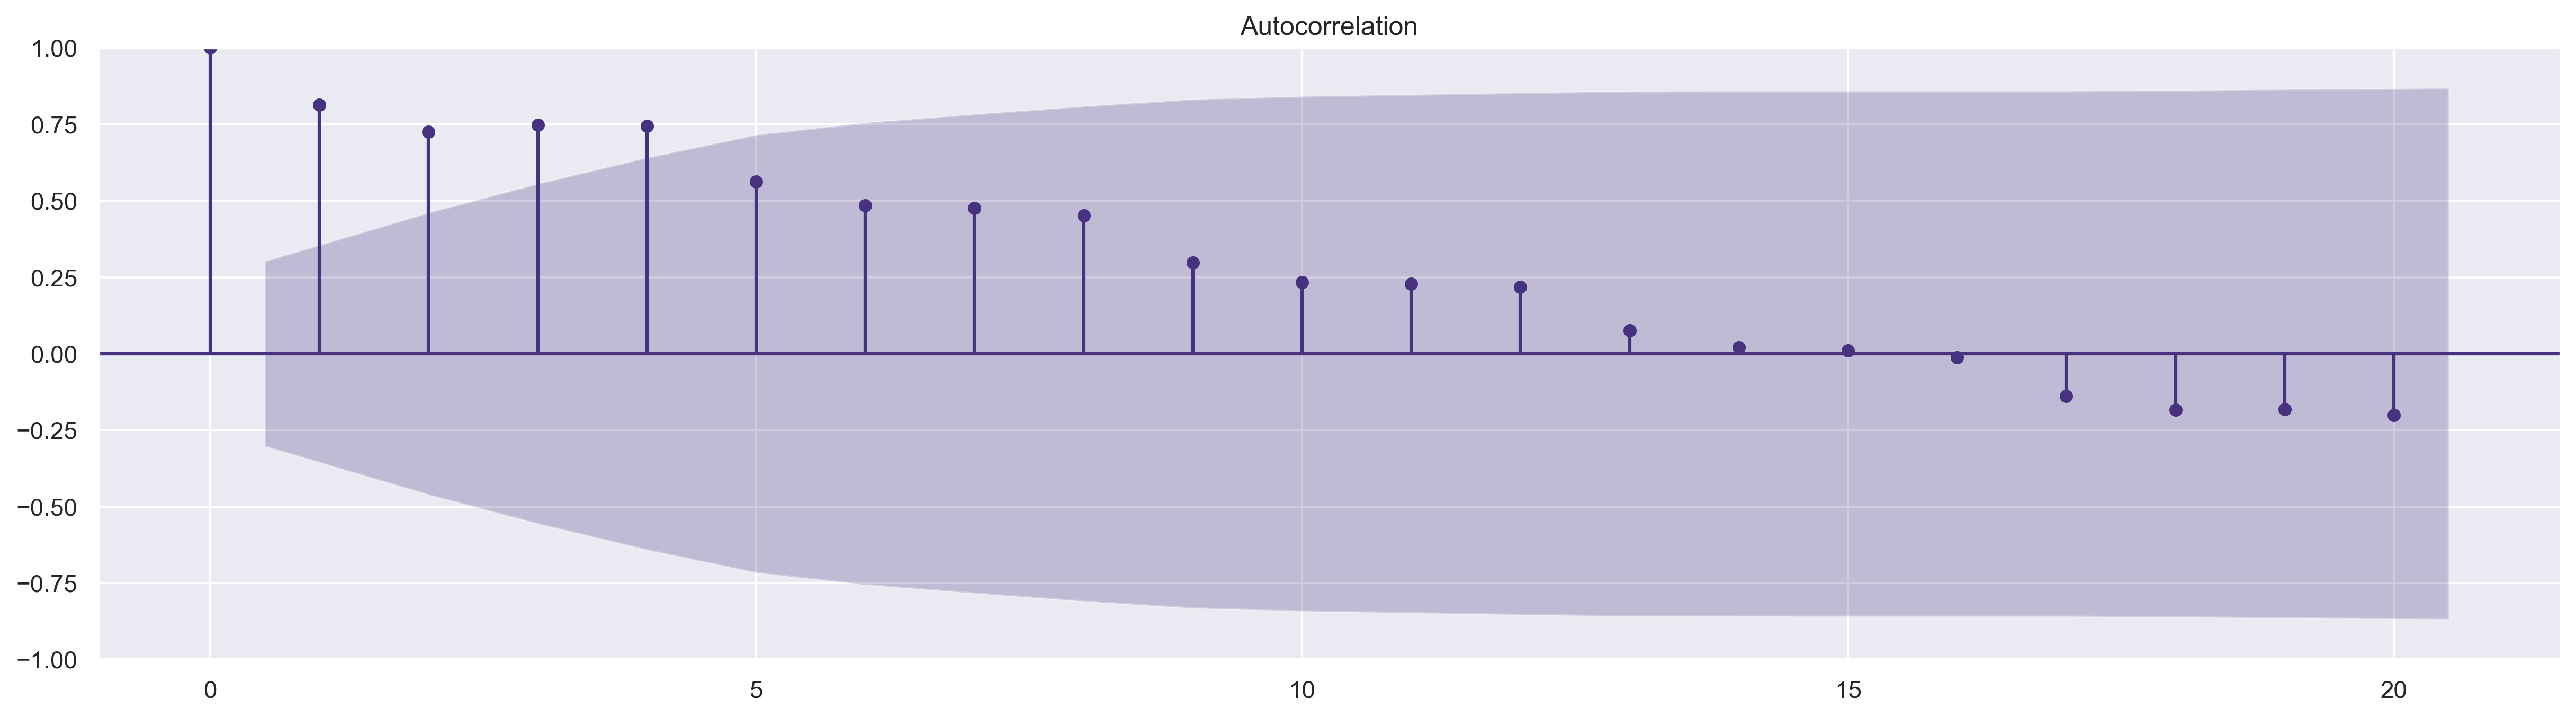

In [11]:
# Autocorrelation plot
plot_acf(df['Sales'], lags = 20)
plt.show()

> * #### 1st, 2nd, 3rd and 4th Lag Variables are crossing the positive standard error, so we can interpret previous four quarter's sales highly affect the current quarter's sales.

* ##### <font color ='green'> <u> Partial Autocorrelation Function:
    + ##### It does the same as regular autocorrelation — shows the correlation of a sequence with itself lagged by some number of time units. But there’s a twist. Only the direct effect is shown, and all intermediary effects are removed.

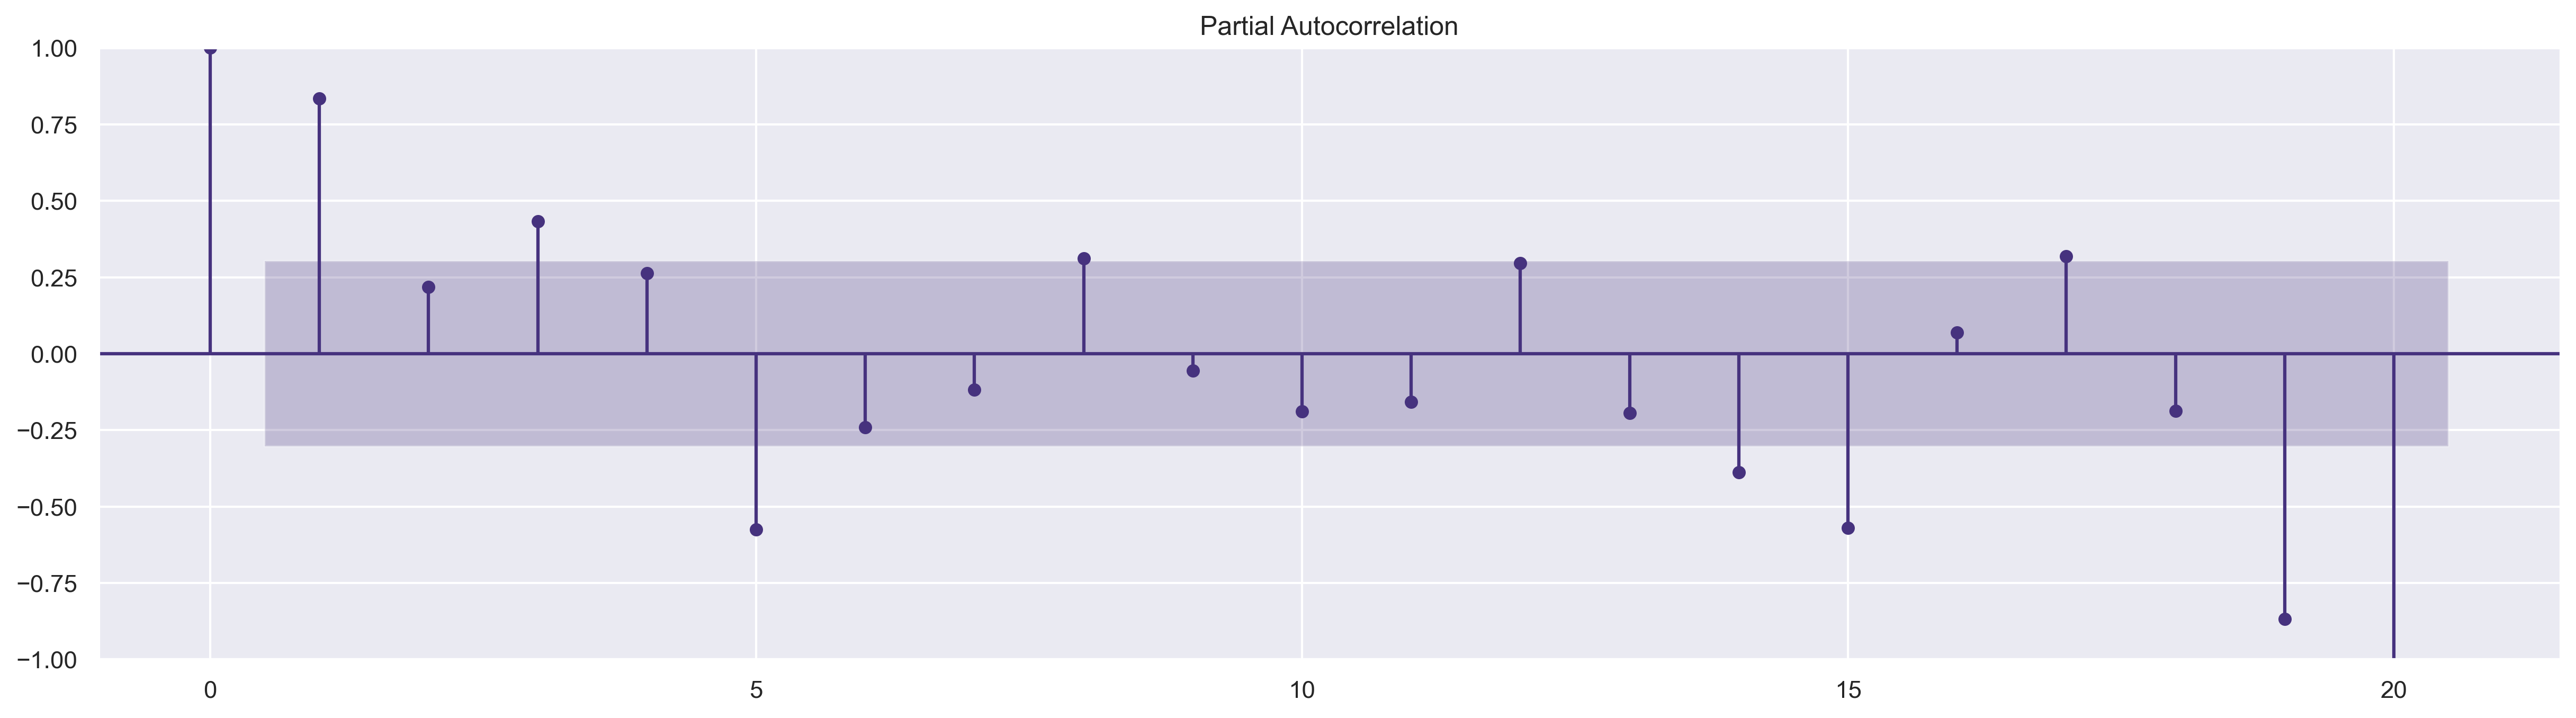

In [12]:
# Plot PACF
plot_pacf(df['Sales'], lags = 20);

> * #### From PACF Plot we can understand that last quarter's Sales have direct impact on current quarter's Sales. Also there is impact of previous year's sales of same quarter.

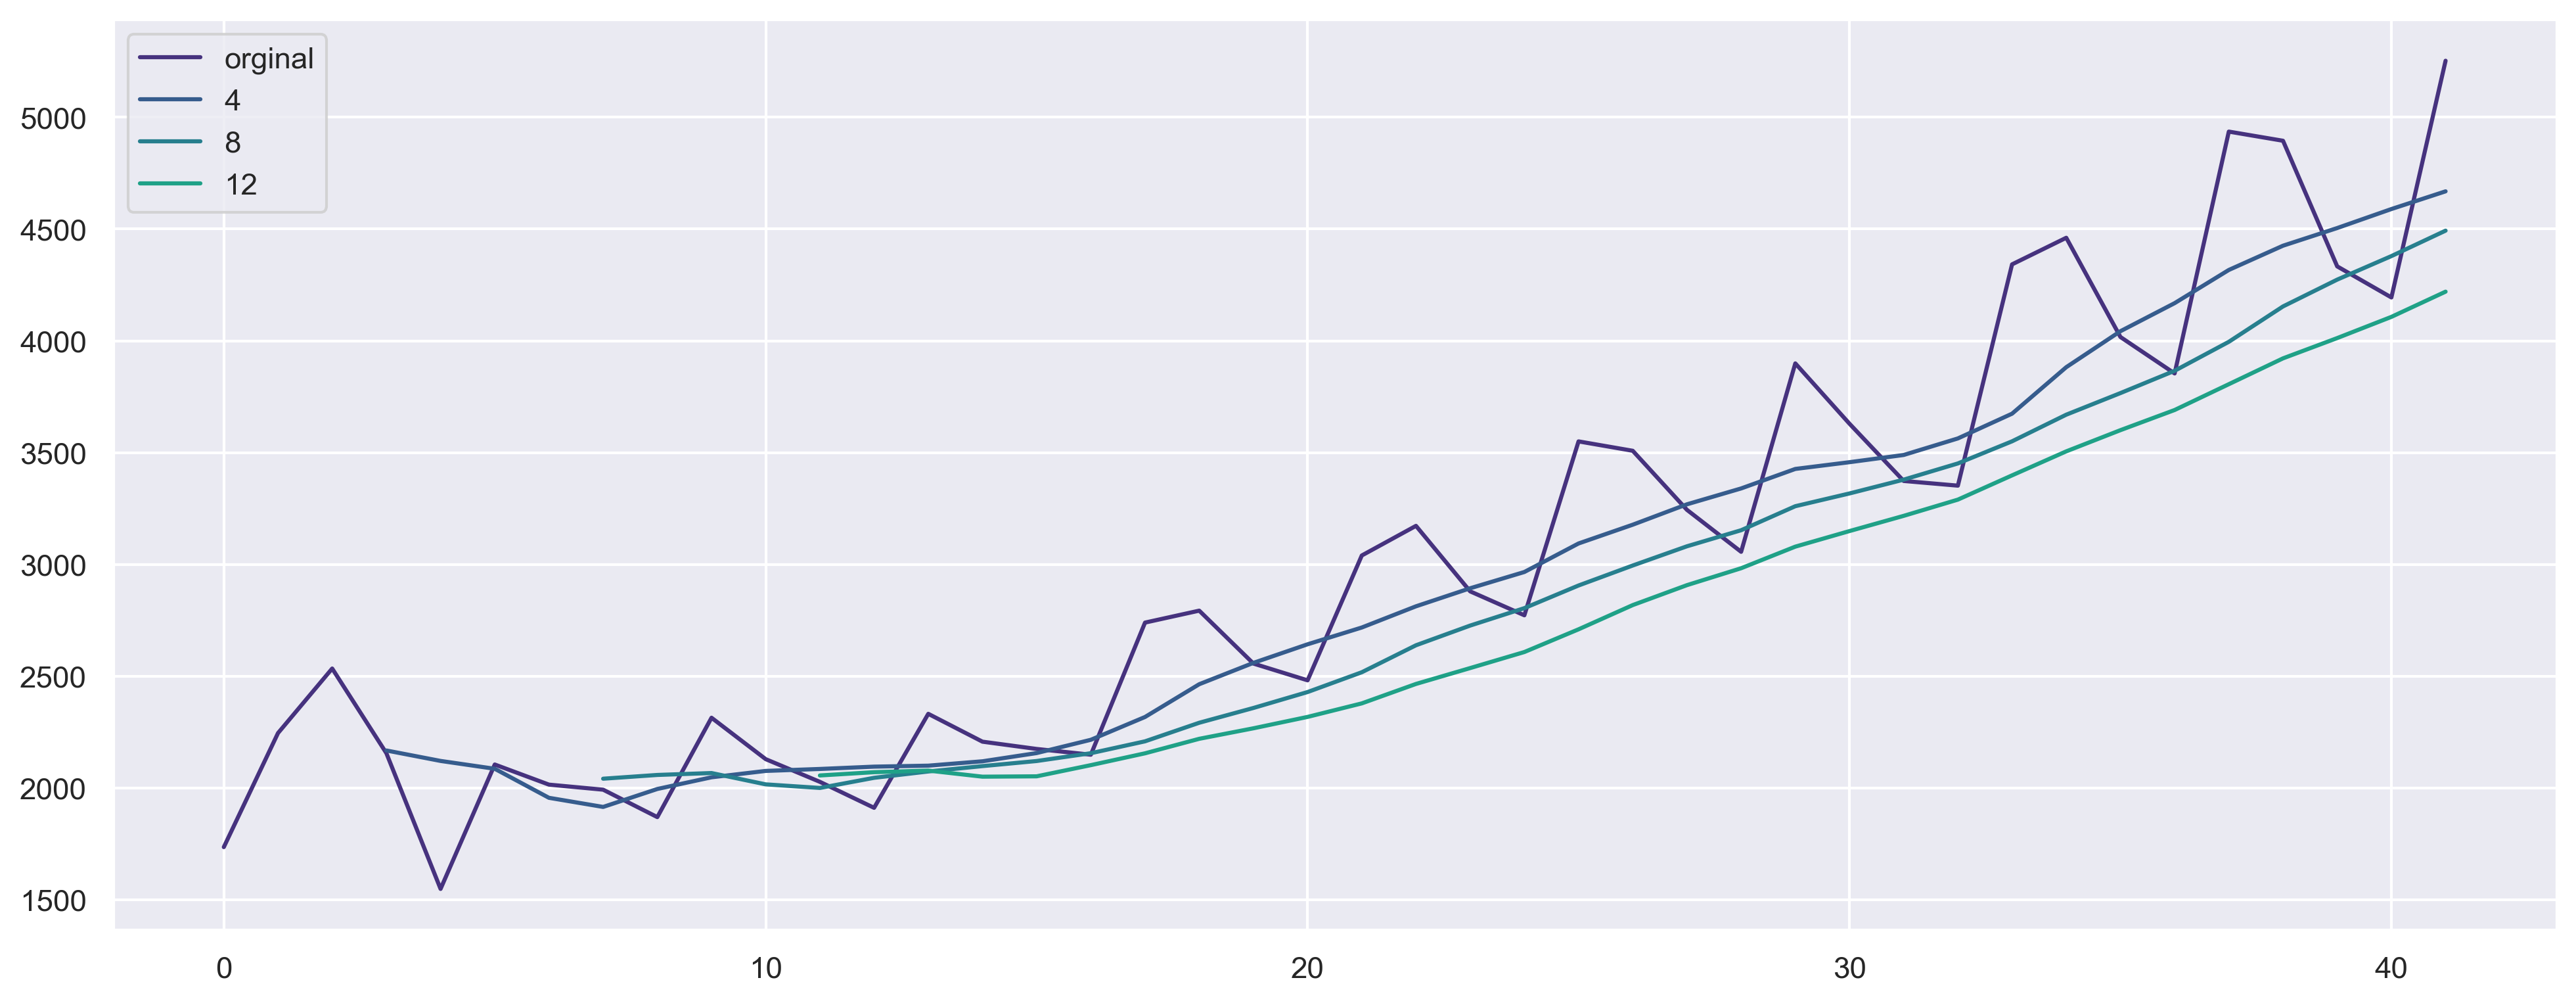

In [13]:
# Moving Average:
plt.figure(figsize=(16,6))
df.Sales.plot(label="orginal")
for i in range(4,13,4):
    df["Sales"].rolling(i).mean().plot(label = str(i))
plt.legend()

> * #### Moving Average removes the Seasonality component and gives overall trend.

___

* ### <font color = 'blue'> <u> DATA PREPROCESSING  </u>

### <font color = "green">➡ Creating Dummy Variables:

In [14]:
df[['quarters','years']] = df.Quarter.str.split('_',expand=True)
df.head()

,Quarter,Sales,quarters,years
0,Q1_86,1734.827000,Q1,86
1,Q2_86,2244.960999,Q2,86
2,Q3_86,2533.804993,Q3,86
3,Q4_86,2154.962997,Q4,86
4,Q1_87,1547.818996,Q1,87


In [15]:
df[['q1','q2','q3','q4']] = pd.get_dummies(df['quarters'],columns=True)
df.head()

,Quarter,Sales,quarters,years,q1,q2,q3,q4
0,Q1_86,1734.827000,Q1,86,1,0,0,0
1,Q2_86,2244.960999,Q2,86,0,1,0,0
2,Q3_86,2533.804993,Q3,86,0,0,1,0
3,Q4_86,2154.962997,Q4,86,0,0,0,1
4,Q1_87,1547.818996,Q1,87,1,0,0,0


In [16]:
df['t'] = range(1,43)
df['t_square'] = df['t'] ** 2
df['log_sales'] = np.log(df['Sales'])
df.head()

,Quarter,Sales,quarters,years,q1,q2,q3,q4,t,t_square,log_sales
0,Q1_86,1734.827000,Q1,86,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,86,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,86,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,86,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,87,1,0,0,0,5,25,7.344602


### <font color = "green">➡ Train Test Split 

In [17]:
train = df.head(34)
test = df.tail(8)

In [18]:
print("Shape of Train Data: ",train.shape)
print("Shape of Test Data: ", test.shape)

Shape of Train Data:  (34, 11)
Shape of Test Data:  (8, 11)


___

* ### <font color = 'blue'> <u> MODEL BUILDING & EVALUATION</u>

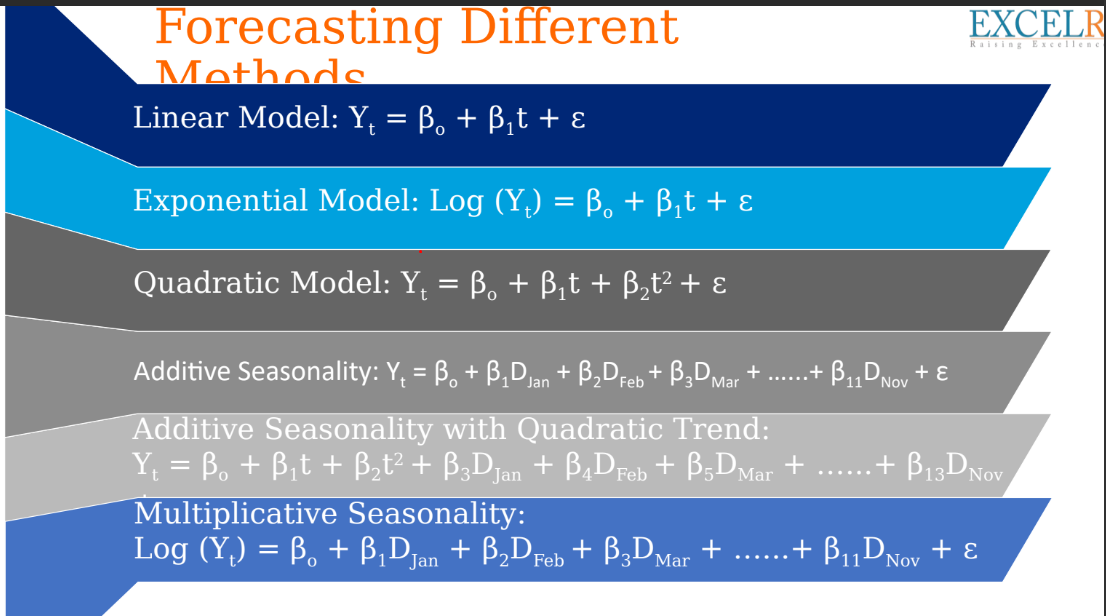

### <font color = "green">1. LINEAR MODEL:

In [19]:
linear_model = smf.ols('Sales~t', data = train).fit()
pred_linear = pd.Series(linear_model.predict(pd.DataFrame(test['t'])))
rmse_linear = np.sqrt(mean_squared_error(test['Sales'], pred_linear))
rmse_linear

720.6137817965259

### <font color = "green">2. EXPONENTIAL MODEL:

In [20]:
exponential_model = smf.ols('log_sales~t', data=train).fit()
pred_exp = pd.Series(exponential_model.predict(pd.DataFrame(test['t'])))
rmse_exponential = np.sqrt(mean_squared_error(test['Sales'],pred_exp))
rmse_exponential

4507.996475118845

### <font color = "green">3. QUADRATIC MODEL:

In [21]:
Quadratic = smf.ols('Sales~t+t_square', data=train).fit()
pred_Quad = pd.Series(Quadratic.predict(test[["t","t_square"]]))
rmse_Quadratic = np.sqrt(mean_squared_error(test['Sales'],pred_Quad))
rmse_Quadratic

437.7455637558559

### <font color = "green">4. ADDITIVE SEASONALITY MODEL:

In [22]:
Additive_sea = smf.ols('Sales~q1+q2+q3', data=train).fit()
pred_add_sea = pd.Series(Additive_sea.predict(test[['q1','q2','q3']]))
rmse_Additive_sea = np.sqrt(mean_squared_error(test['Sales'], pred_add_sea))
rmse_Additive_sea

1870.1899069853291

### <font color = "green">5. QUADRATIC ADDITIVE SEASONALITY MODEL:

In [23]:
Quadratic_Additive = smf.ols('Sales~t+t_square+q1+q2+q3', data=train).fit()
pred_quad_add = pd.Series(Quadratic_Additive.predict(test[['q1','q2','q3','t','t_square']]))
rmse_Quadratic_Additive = np.sqrt(mean_squared_error(test['Sales'], pred_quad_add))
rmse_Quadratic_Additive 

257.67172565362154

### <font color = "green">6. MULTIPLICATIVE SEASONALITY MODEL:

In [24]:
Multiplicative_sea = smf.ols('log_sales~q1+q2+q3', data = train).fit()
pred_Mult_sea = pd.Series(Multiplicative_sea.predict(test))
rmse_Multiplicative_sea = np.sqrt(mean_squared_error(test['Sales'], pred_Mult_sea))
rmse_Multiplicative_sea

4508.457293546332

### <font color = "green">7. ARIMA MODEL:

+ #### ARIMA is composed of 3 terms(Auto-Regression(p) + Integrated(d) + Moving-Average(q))

+ #### We need to find out the order of arima model (values for p,d,q)

+ #### ARIMA model works on Stationary data. In line chart we can see that there is an exponential increasing Trend. So, Trend is not constant. Variance is also not constant. Hence the time serise is not stationary. So we will convert non stationary data into stationary.

In [25]:
# Test for checking Stationary Data or not:
adfuller(df['Sales'])[1]

0.9966611673930905

**Null hypothesis: Data is Non stationary**

**Alternate Hypothesis: Data is Stationary**
   
- If p < 0.05 ; Data is stationary

- if p > 0.05; Data is not stationary

**According the p-value, the dataset is non stationary as the p value is greater than alpha value.**

In [26]:
#find out order of arima 
order = auto_arima(df['Sales'])
order

ARIMA(order=(4, 1, 0), scoring_args={}, suppress_warnings=True)

p = 4, d = 1, q = 0

**differencing(d) is used to make non stationary data into stationary data.**

In [27]:
#Arima model
arima = ARIMA(train['Sales'], order=(4, 1, 0)).fit()

In [28]:
test

,Quarter,Sales,quarters,years,q1,q2,q3,q4,t,t_square,log_sales
34,Q3_94,4461.0,Q3,94,0,0,1,0,35,1225,8.403128
35,Q4_94,4017.0,Q4,94,0,0,0,1,36,1296,8.298291
36,Q1_95,3854.0,Q1,95,1,0,0,0,37,1369,8.256867
37,Q2_95,4936.0,Q2,95,0,1,0,0,38,1444,8.504311
38,Q3_95,4895.0,Q3,95,0,0,1,0,39,1521,8.495970
39,Q4_95,4333.0,Q4,95,0,0,0,1,40,1600,8.374015
40,Q1_96,4194.0,Q1,96,1,0,0,0,41,1681,8.341410
41,Q2_96,5253.0,Q2,96,0,1,0,0,42,1764,8.566555


In [29]:
arima_pred = arima.predict(start = 34, end = 41)
arima_pred

34    3953.614131
35    3669.038891
36    3712.005097
37    4574.377305
38    4105.124132
39    3828.271337
40    3940.814637
41    4689.195942
Name: predicted_mean, dtype: float64

In [30]:
rmse_arima = np.sqrt(mean_squared_error(test['Sales'], arima_pred))

In [31]:
print("RMSE value for ARIMA model is : ", rmse_arima)

RMSE value for ARIMA model is :  473.03324848856215


___

* ### <font color = 'blue'> <u> COMPARING THE RMSE VALUES: </u>

In [32]:
Results = {"MODEL":pd.Series(["Linear_model", "Exponential_model", "Quadratic","Additive_sea", "Quadratic_Additive", "Multiplicative_sea", "ARIMA"]),
           "RMSE_Values":pd.Series([rmse_linear, rmse_exponential, rmse_Quadratic, rmse_Additive_sea, rmse_Quadratic_Additive, rmse_Multiplicative_sea, rmse_arima])}
rmse_table = pd.DataFrame(Results)
rmse_table.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
4,Quadratic_Additive,257.671726
2,Quadratic,437.745564
6,ARIMA,473.033248
0,Linear_model,720.613782
3,Additive_sea,1870.189907
1,Exponential_model,4507.996475
5,Multiplicative_sea,4508.457294


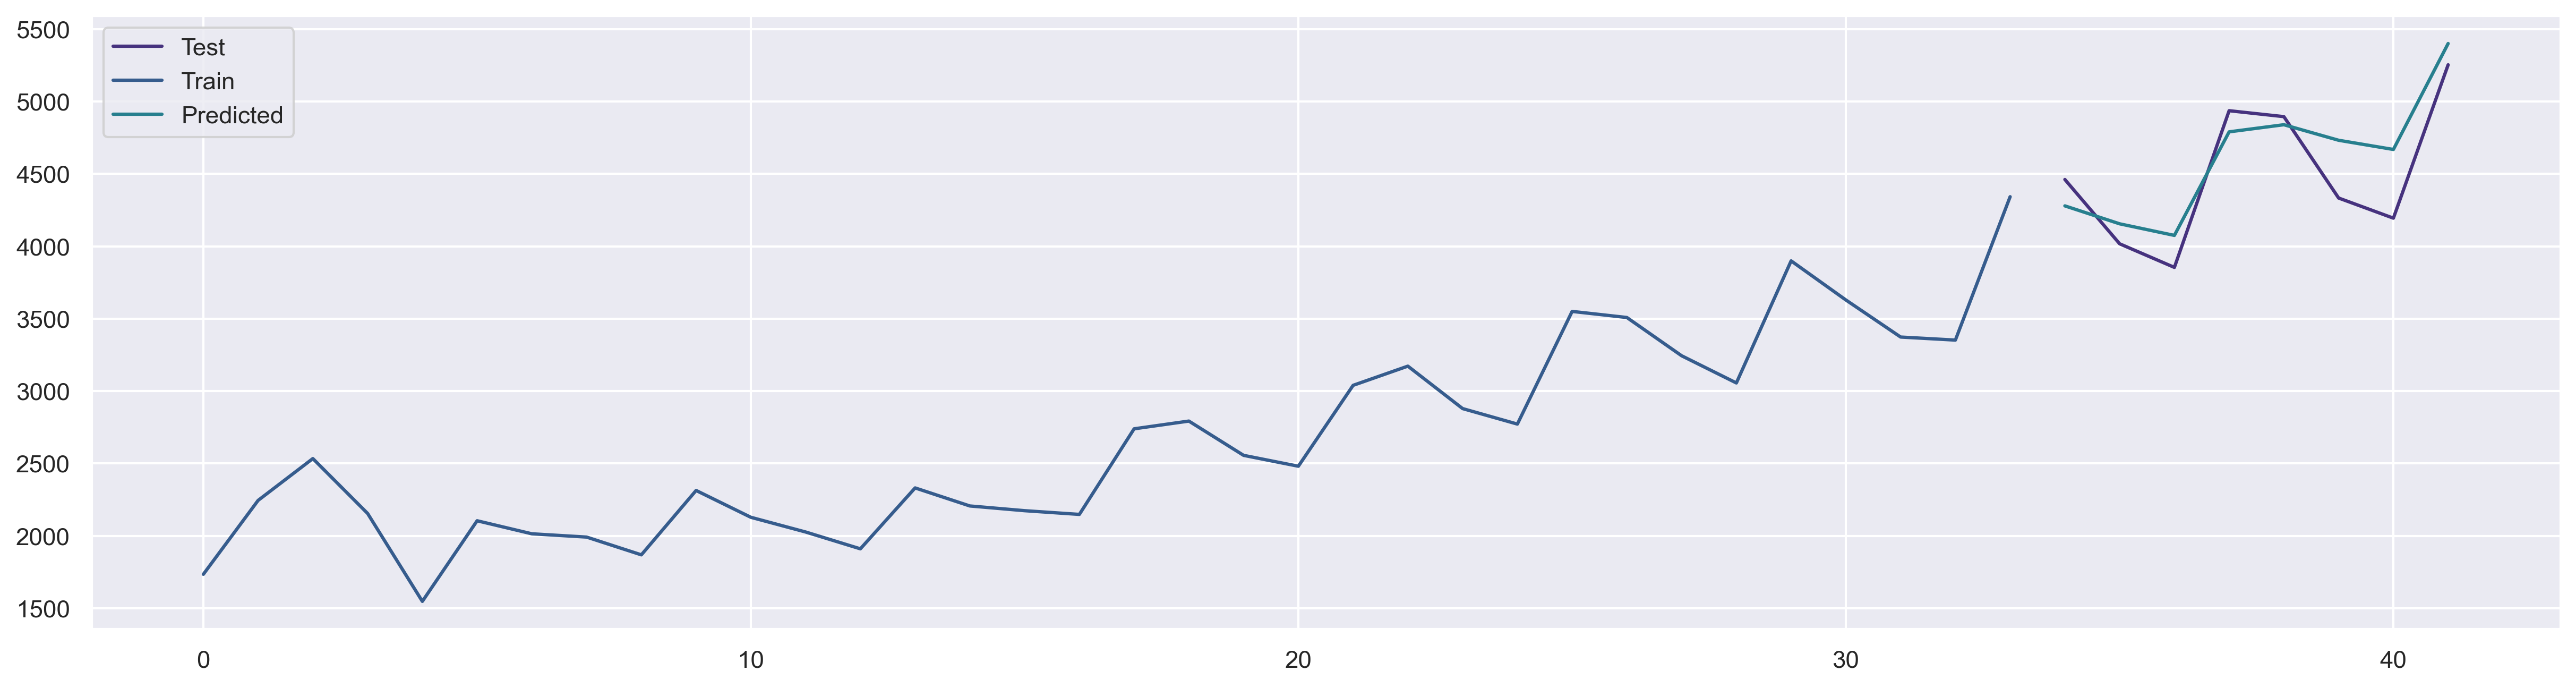

In [33]:
plt.plot(test['Sales'], label = 'Test')
plt.plot(train['Sales'], label = 'Train')
plt.plot(pred_quad_add, label = 'Predicted')
plt.legend()

* ### <font color = 'blue'> <u> CONCLUSION </u>
    
> * #### Quadratic Additive Model gives lowest RMSE value among the all models. So we will use this model for final forecasting.
> * #### Machine learning Forecasting helps us to know the trend of data which can not be observed through the visualisations. 

<br>
<br>
<br>

> # <font color = 'magenta'><u>END</u>
___